Karen Gong

PHYS 434 HW 4

In [53]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

Problem 0: Some Fake Data

Make some fake background data.

In [54]:
# let's make a time axis that goes from 0 to 100 π  in 1e5 steps
t = np.linspace(0,np.pi*100,np.int(1e5))

# make an offset sinusoid
N = 10+np.sin(t)

#random background data whose mean and variance depend on N
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

Problem 1: Subsets of Data

Here we will plot small portions of the data. This is often called array slicing in Python, but in other languages it has no special terminology. The goal is to make the following plots. 

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

Text(0, 0.5, 'random background data')

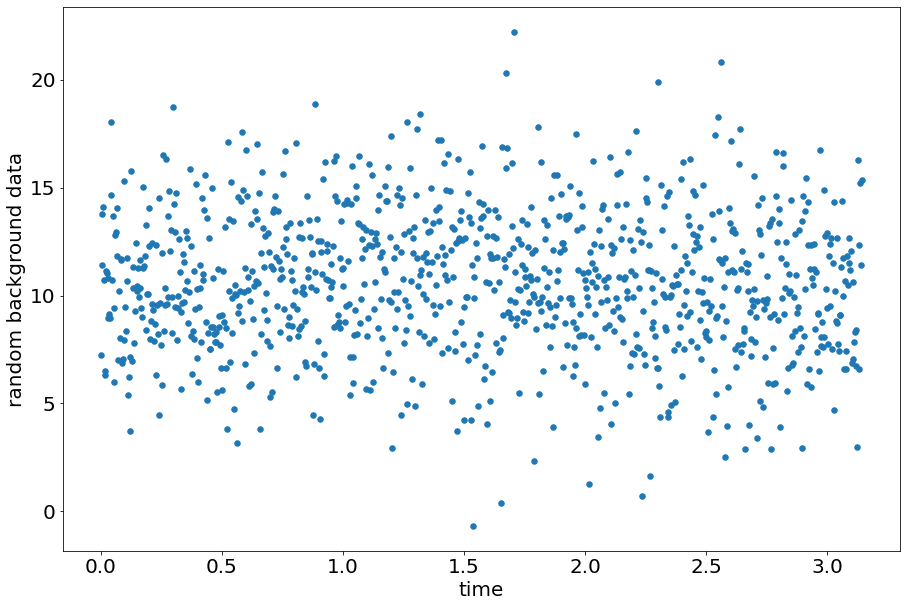

In [55]:
plt.scatter(t[:1001], bkgd[:1001], s=30)
plt.tick_params(labelsize = 20)
plt.xlabel("time", size = 20)
plt.ylabel("random background data", size = 20)

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

Text(0, 0.5, 'random background data')

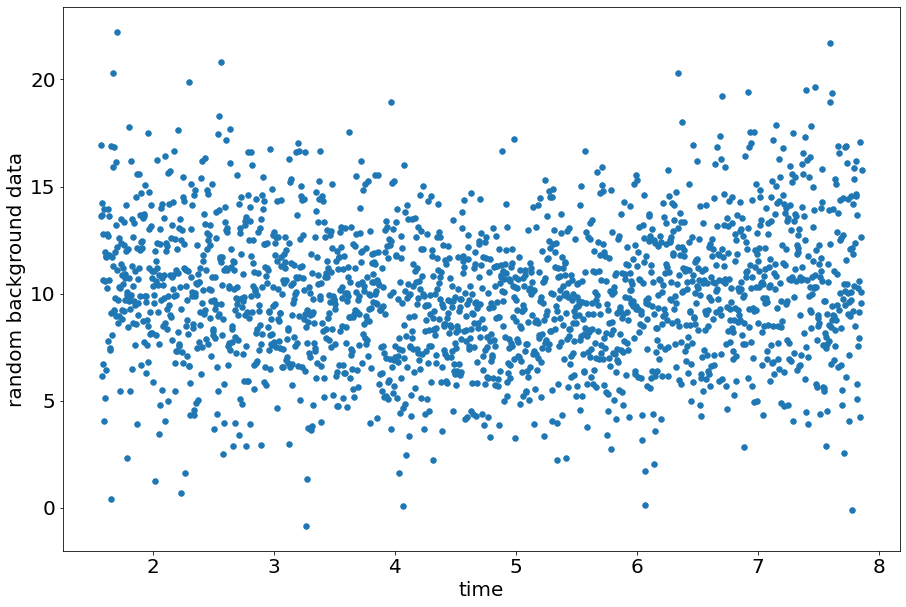

In [56]:
# function creates a scatter plot
# takes in four parameters: x-array, y-array, starting value (beginning of X contiguous points, end value (number of points
# or the ending value in the range of contiguous points)
def plotscat(x, y, start, end):
    plt.scatter(x[start:end + 1], y[start:end + 1], s = 30)
    plt.tick_params(labelsize = 20)
   # plt.show()
    
plotscat(t, bkgd, 500, 500 + 2000)
plt.xlabel("time", size = 20)
plt.ylabel("random background data", size = 20)

1c) Make a plot of the full data range, but only every 100th point.

Text(0, 0.5, 'random background data')

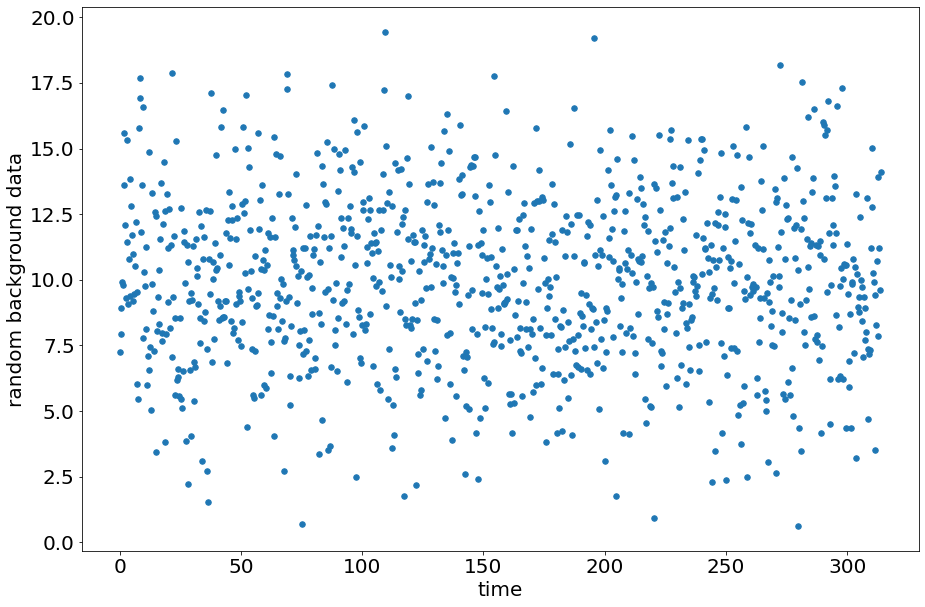

In [57]:
plt.scatter(t[::100], bkgd[::100], s=30)
plt.tick_params(labelsize = 20)
plt.xlabel("time", size = 20)
plt.ylabel("random background data", size = 20)

Problem 2: Density

As the points plotted on a scatter plot increases, the more the points all overlap to look like a blob. It's better to plot the density of the points. The best way to do this is using a 2D histogram plot (plt.hist2d()).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

Text(0, 0.5, 'random background data')

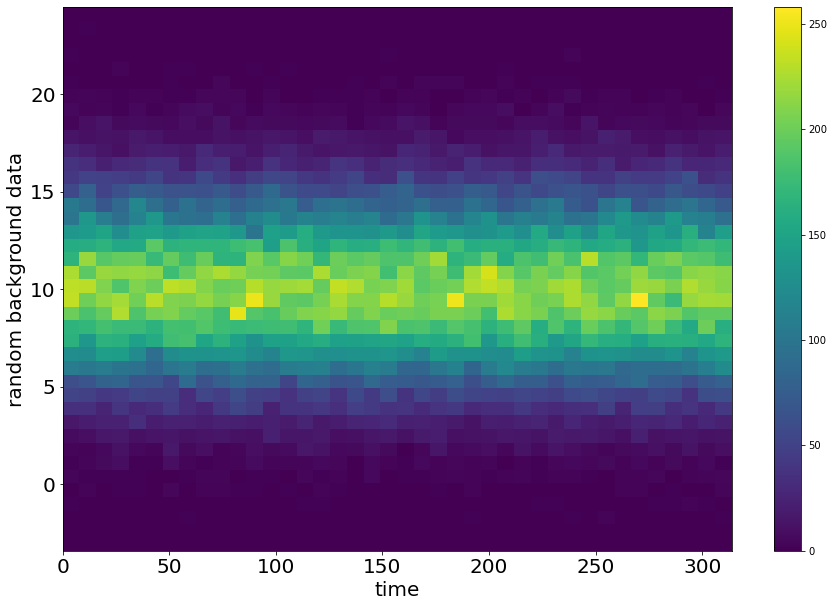

In [58]:
plt.hist2d(t, bkgd, bins = 40)
plt.colorbar()
plt.tick_params(labelsize = 20)
plt.xlabel("time", size = 20)
plt.ylabel("random background data", size = 20)

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

The plot shows where the data is concentrated. If there is a large concentration of data points in a region (large density), the graph will show a lighter shade. The areas where the data points are less concentrated and more spread out, the graph will be darker in shade. 

Problem 3: Folding

If you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of 2π (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

Text(0, 0.5, 'random background data')

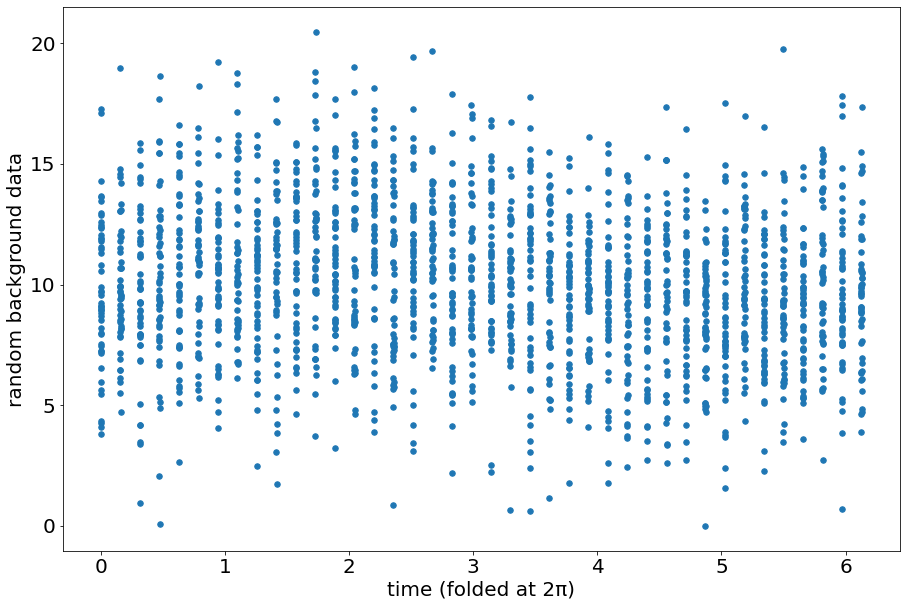

In [59]:
# let's make a time axis that goes from 0 to 2π
newtime = (t + 2 * np.pi) % (2 * np.pi)

# plot every 50th point
plt.scatter(newtime[::50], bkgd[::50], s=30)
plt.tick_params(labelsize = 20)
plt.xlabel("time (folded at 2π)", size = 20)
plt.ylabel("random background data", size = 20)

3b) Make a 2D histogram plot of your folded data.

Text(0, 0.5, 'random background data')

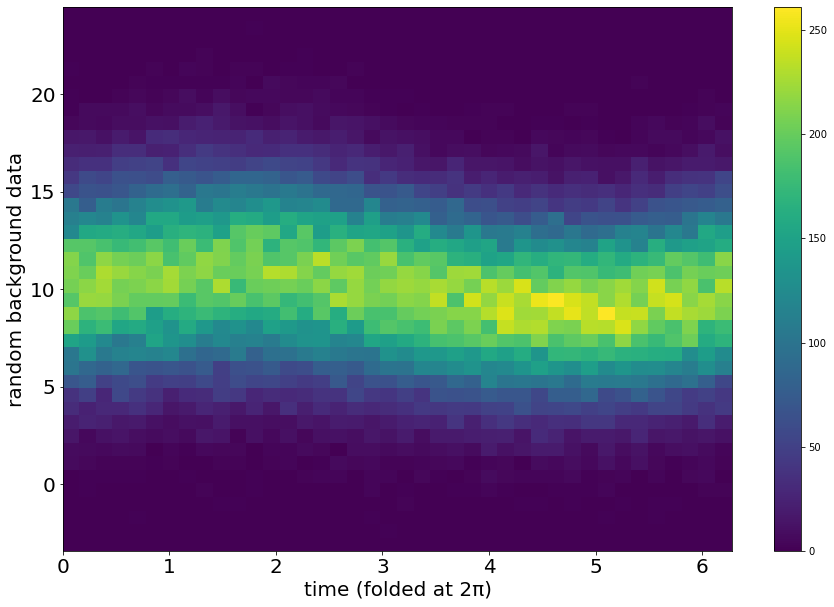

In [60]:
plt.hist2d(newtime, bkgd, bins = 40)
plt.colorbar()
plt.tick_params(labelsize = 20)
plt.xlabel("time (folded at 2π)", size = 20)
plt.ylabel("random background data", size = 20)

3c) Optional: You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded variable. You can then overplot this on 3b to show the average as a function of folded time.

[1.0928262  1.20855042]


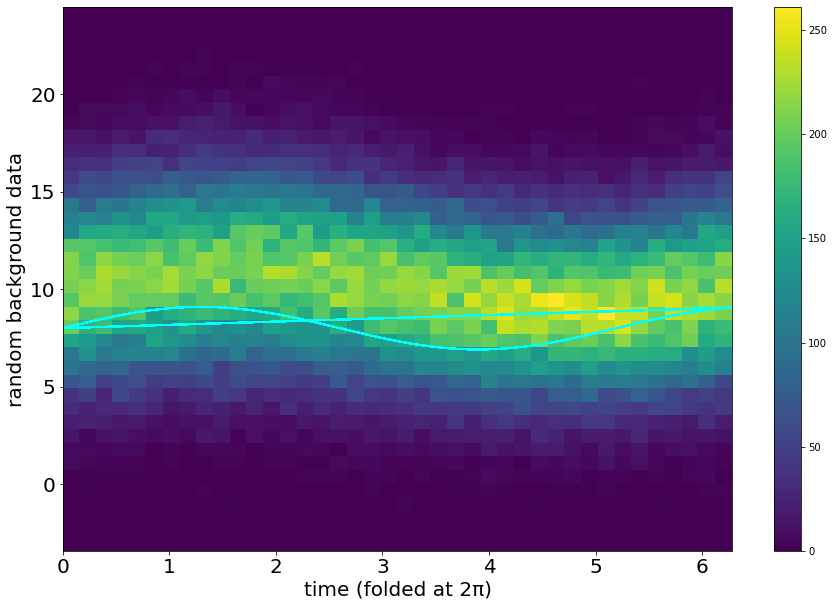

In [124]:
def test_func(x, a, b):
    return (a * np.sin(b * x)) + 8

params, params_covariance = scipy.optimize.curve_fit(test_func, newtime, bkgd, p0=[1, 2])

print(params)


plt.hist2d(newtime, bkgd, bins = 40)
plt.colorbar()
plt.tick_params(labelsize = 20)
plt.xlabel("time (folded at 2π)", size = 20)
plt.ylabel("random background data", size = 20)

plt.plot(newtime, test_func(newtime, params[0], params[1]),
         label='Fitted function', color = 'cyan')

plt.show()